# Exercise 1: Searching a Larger Space

## Objective
Understand how Grover's Algorithm scales with the number of qubits (`n`) and verify that the helper functions automatically adjust the circuit size.

## Task
- Change the `marked_states` variable to search for a single 4-qubit state: `"1101"`.
- Run the `Grover_oracle`, `Grover_operator`, and the final simulation.
- **Question:** Look at the Optimal number of iterations output. How does this compare to the 3-qubit example? Does it require more or fewer iterations? Repeat for 5-qubit case and observe the behaviour.

---

## Part A: 4-Qubit Case

In [ ]:



from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution




### Step 1: Define the marked state for 4 qubits

In [ ]:

marked_states_4 = ["1101"]


### Step 2: Build the oracle and operator

In [ ]:

oracle_4 = Grover_oracle(marked_states_4)
operator_4 = Grover_operator(oracle_4)

### Step 3: Calculate optimal iterations
`
The formula is: `floor(π / (4 × arcsin(√(M/N))))`

Where:
- `M` = number of marked states
- `N` = total number of states = `2^n`

`

In [ ]:

n_4 = 4
M_4 = len(marked_states_4)   # M = 1
N_4 = 2 ** n_4                # N = 16

optimal_iterations_4 = math.floor(math.pi / (4 * math.asin(math.sqrt(M_4 / N_4))))
print(f"Number of qubits: {n_4}")
print(f"Total states (N): {N_4}")
print(f"Marked states (M): {M_4}")
print(f"Optimal number of iterations: {optimal_iterations_4}")



Number of qubits: 4
Total states (N): 16
Marked states (M): 1
Optimal number of iterations: 3


### Step 4: Build and run the circuit

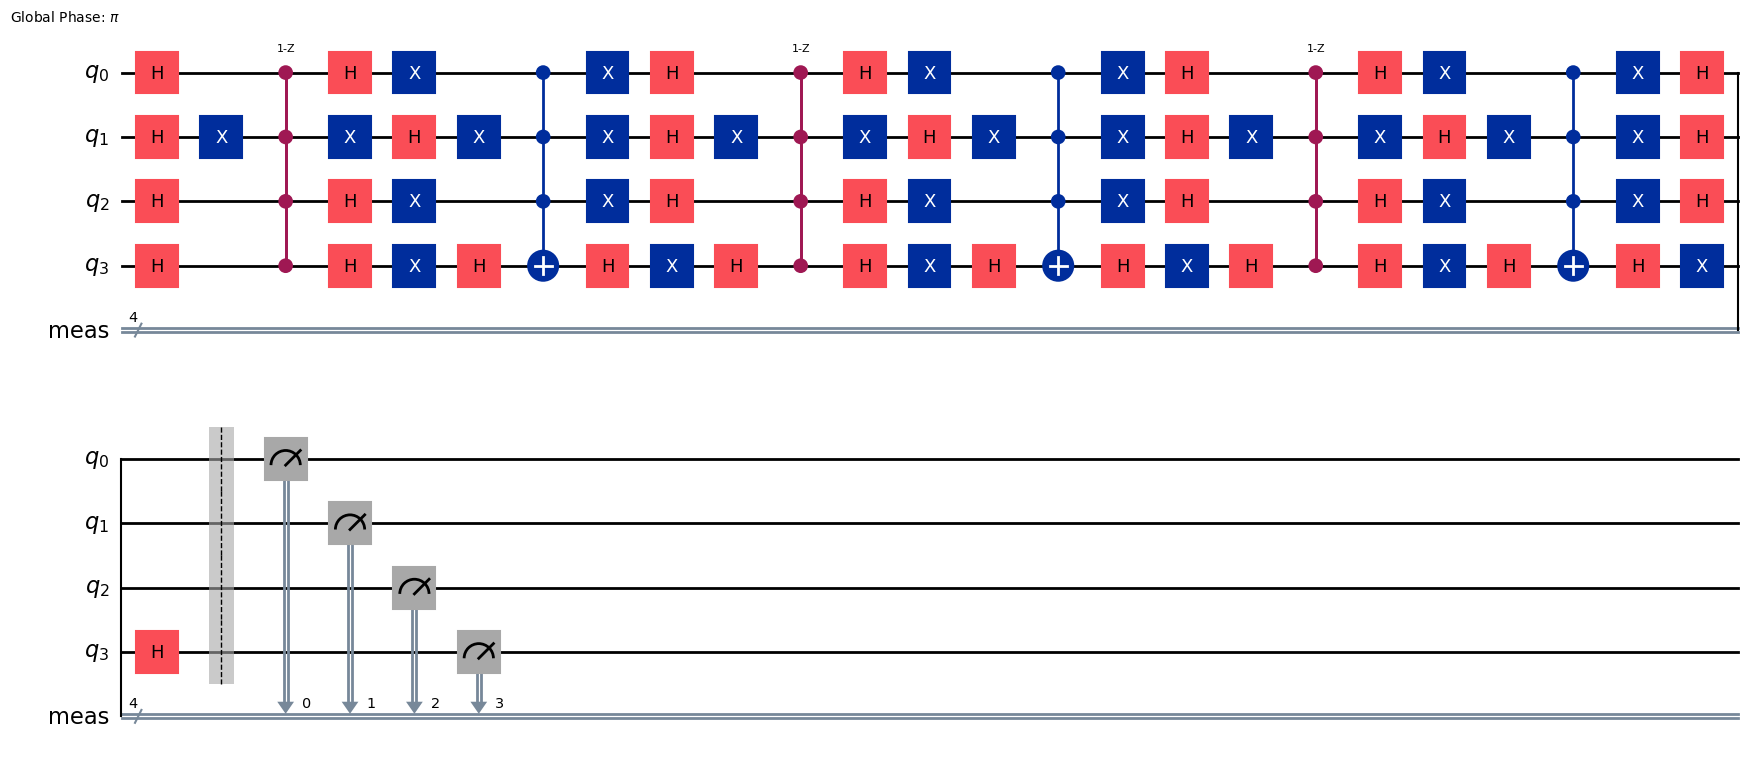

In [ ]:



qc_4 = QuantumCircuit(n_4)
qc_4.h(range(n_4))

for _ in range(optimal_iterations_4):
    qc_4.compose(operator_4, inplace=True)

qc_4.measure_all()
(qc_4.draw(output="mpl", style="iqp"))


### Step 5: Run on backend using the fake provider and 10000 shots

In [ ]:


backend = FakeAlgiers()
data_pub_4 = Get_Data_from_Fake_backend(10000, qc_4, backend)
counts_4 = data_pub_4.meas.get_counts()
print(counts_4)


{'1100': 473, '1001': 553, '0001': 426, '0111': 408, '0100': 391, '0011': 350, '1010': 330, '1101': 3885, '0110': 329, '0101': 553, '1111': 504, '1000': 368, '0010': 332, '1011': 393, '0000': 363, '1110': 342}


### Step 6: Plot the results

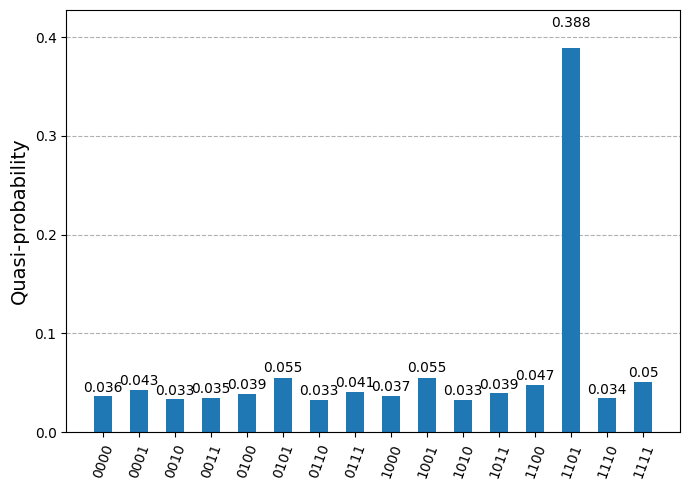

In [ ]:



plot_distribution(counts_4)






# Part B: 5-Qubit Case

### Step 1: Define the marked state for 5 qubits

In [ ]:


marked_states_5 = ["11010"]



### Step 2: Build the oracle and operator

In [ ]:


oracle_5 = Grover_oracle(marked_states_5)
operator_5 = Grover_operator(oracle_5)

### Step 3: Calculate optimal iterations

In [ ]:


n_5 = 5
M_5 = len(marked_states_5)   # M = 1
N_5 = 2 ** n_5                # N = 32

optimal_iterations_5 = math.floor(math.pi / (4 * math.asin(math.sqrt(M_5 / N_5))))
print(f"Number of qubits: {n_5}")
print(f"Total states (N): {N_5}")
print(f"Marked states (M): {M_5}")
print(f"Optimal number of iterations: {optimal_iterations_5}")

Number of qubits: 5
Total states (N): 32
Marked states (M): 1
Optimal number of iterations: 4


### Step 4: Build and run the circuit

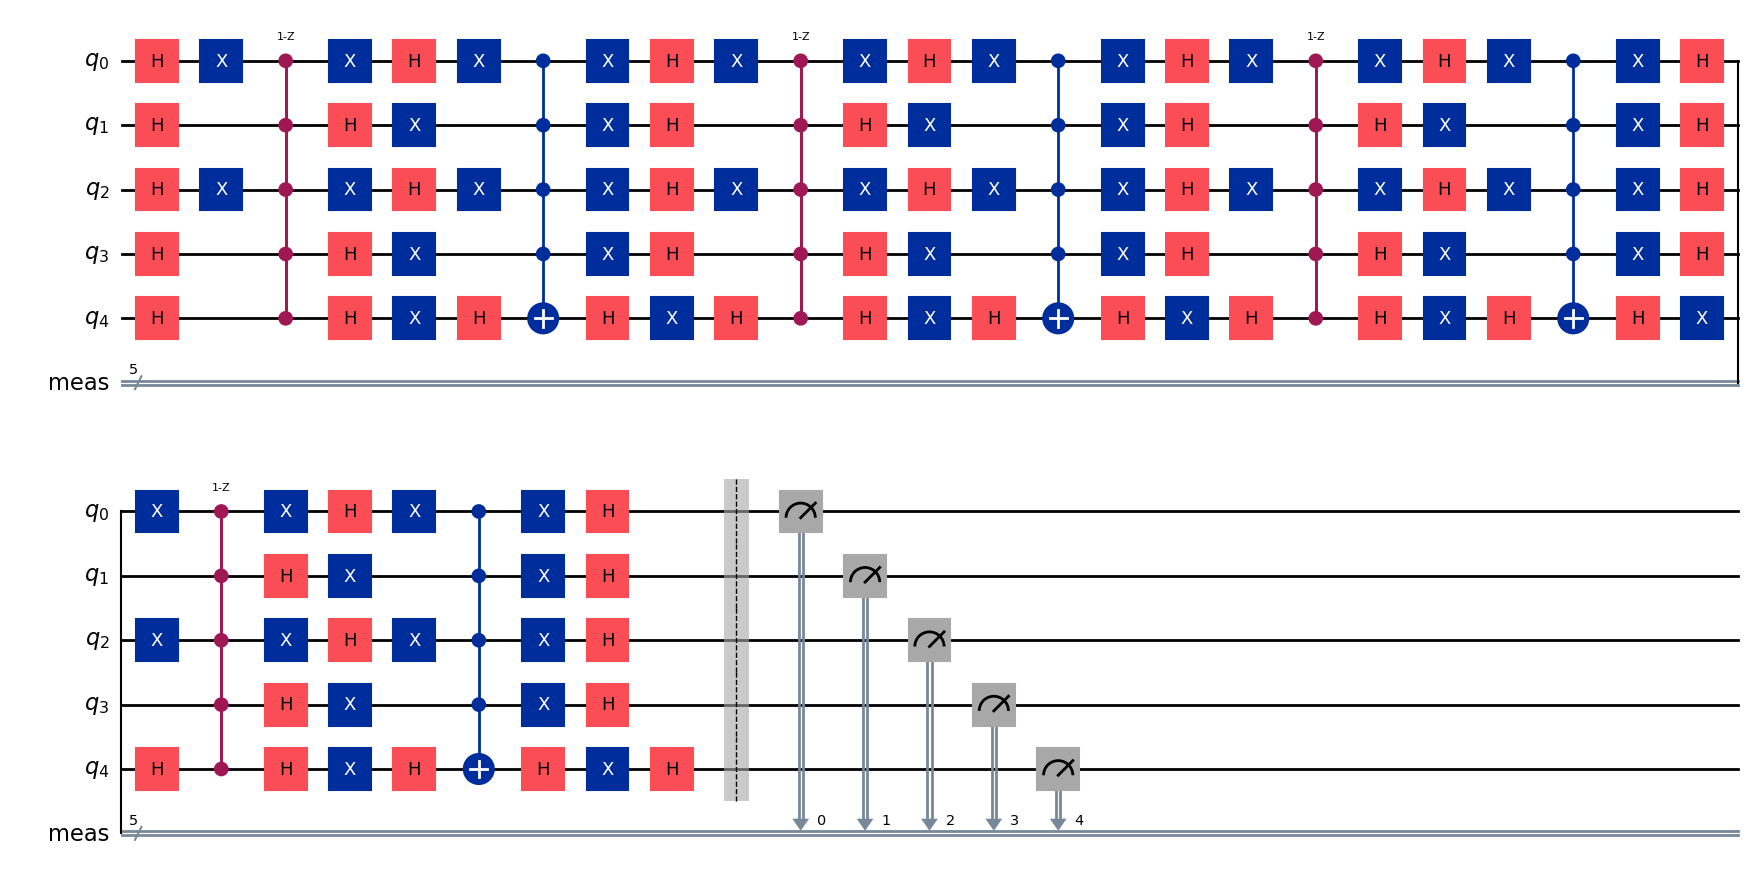

In [ ]:


qc_5 = QuantumCircuit(n_5)
qc_5.h(range(n_5))

for _ in range(optimal_iterations_5):
    qc_5.compose(operator_5, inplace=True)

qc_5.measure_all()
(qc_5.draw(output="mpl", style="iqp"))

### Step 5: Run on backend using the fake provider and 10000 shots

In [ ]:



data_pub_5 = Get_Data_from_Fake_backend(10000, qc_5, backend)
counts_5 = data_pub_5.meas.get_counts()
print(counts_5)

{'00000': 289, '10001': 288, '10011': 339, '00001': 315, '01110': 289, '11111': 296, '00010': 303, '01010': 320, '00110': 304, '11010': 486, '01011': 304, '01101': 312, '10101': 340, '00011': 322, '01001': 294, '11001': 290, '10010': 317, '11110': 336, '10000': 294, '11100': 312, '11101': 291, '01111': 305, '10111': 319, '01000': 285, '11000': 291, '10100': 289, '11011': 277, '00111': 342, '00100': 273, '10110': 316, '01100': 309, '00101': 353}


### Step 6: Plot the results

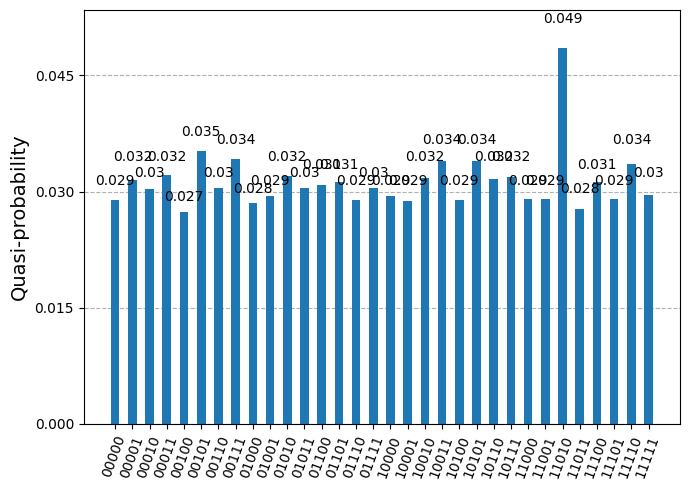

In [ ]:


plot_distribution(counts_5)


## Comparison: How Grover's Scales with Qubits

In [ ]:


print(f"{'Qubits (n)':<12} {'States (N)':<12} {'Marked (M)':<12} {'Optimal Iters':<15}")
print("-" * 51)
print(f"{'3':<12} {'8':<12} {'1':<12} {'2':<15}")
print(f"{n_4:<12} {N_4:<12} {M_4:<12} {optimal_iterations_4:<15}")
print(f"{n_5:<12} {N_5:<12} {M_5:<12} {optimal_iterations_5:<15}")


Qubits (n)   States (N)   Marked (M)   Optimal Iters  
---------------------------------------------------
3            8            1            2              
4            16           1            3              
5            32           1            4              


## Answers

### How does the 4-qubit case compare to the 3-qubit example?

It requires **more iterations** (3 vs 2). As we add more qubits, the search space doubles and the algorithm needs more steps to amplify the marked state.

### How does the 5-qubit case compare?

Even more iterations are needed (4). The pattern is clear:

| Qubits (n) | States (N) | Optimal Iterations | Classical Search |
|---|---|---|---|
| 3 | 8 | 2 | ~8 checks |
| 4 | 16 | 3 | ~16 checks |
| 5 | 32 | 4 | ~32 checks |

The optimal number of iterations grows as **√N**, which is Grover's famous **quadratic speedup**:

$$\text{Optimal iterations} \approx \frac{\pi}{4} \sqrt{N}$$


`While classical search needs `N` steps to find the answer, Grover's only needs `√N` — a massive speedup for large search spaces.`